In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from tensorboardX import SummaryWriter
from tqdm import tqdm
import numpy as np
from sklearn.cluster import KMeans
import sys
import copy
from torchvision.utils import make_grid
from matplotlib import pyplot as plt

from models import *
from prob import ProbabilityModel
from dataloader import *
from hyper import *
from util import *
from inference import *

In [2]:
encoder = Encoder().to(device)
importance = Importance().to(device)
decoder = Decoder().to(device)
probabilityModel = ProbabilityModel().to(device)
vgg16 = VGG16().to(device)

# load weights
arch = torch.load('/mnt/HDD3/weights_all/b8')
encoder.load_state_dict(arch['encoder'])
importance.load_state_dict(arch['importance'])
decoder.load_state_dict(arch['decoder'])
probabilityModel.load_state_dict(arch['probabilityModel'])

# kmeans on decoder bias
dec_bias = []
dec_bias.append(list(decoder.conv1[0].bias.detach().cpu().numpy()) +
                    list(decoder.conv2[0].bias.detach().cpu().numpy()) +
                    list(decoder.conv3.bias.detach().cpu().numpy()))

dec_bias_raw, d1, d2, d3 = arch['dec_bias_raw'], arch['d1'], arch['d2'], arch['d3']
# kmeans = KMeans(n_clusters=256, random_state=0).fit(dec_bias_raw)
# dec_bias_center = torch.nn.Parameter(torch.tensor(kmeans.cluster_centers_))

kmeans = KMeans(n_clusters=255, random_state=0).fit(dec_bias_raw)
dec_bias.extend(kmeans.cluster_centers_.tolist())
dec_bias = np.array(dec_bias)

# quantizer
round_straightthrough = RoundStraightThrough().apply

# losses
L1_loss = nn.L1Loss(reduction='sum')
MSE_loss = nn.MSELoss(reduction='sum')

jpeg_ai = JPEG_AI('jpeg_ai', mode='test', n_way=1, k_shot=1, k_query=1, batchsz=50, resize=256)

shuffle DB :test, b:50, 1-way, 1-shot, 1-query, resize:256


In [3]:
b = 8

/home/user/.conda/envs/L2C/lib/python3.7/site-packages/torch/nn/functional.py:2539: UserWarning: nn.functional.upsample_nearest is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample_nearest is deprecated. Use nn.functional.interpolate instead.")
/home/user/.conda/envs/L2C/lib/python3.7/site-packages/torch/nn/functional.py:1339: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/user/.conda/envs/L2C/lib/python3.7/site-packages/torch/nn/functional.py:1350: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


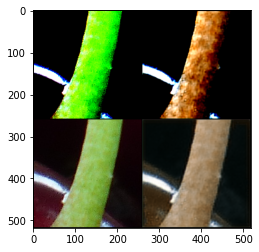

MS-SSIM loss: 0.226 | MSE: 26763.863 | perceptual loss: 1485630.625 | bpp: 0.178 |  PSNR: 21.618


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


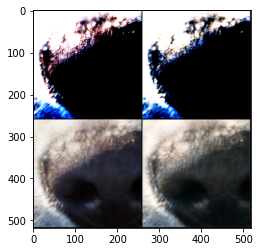

MS-SSIM loss: 0.085 | MSE: 6232.078 | perceptual loss: 1646157.375 | bpp: 0.238 |  PSNR: 27.898


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


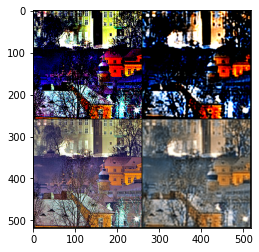

MS-SSIM loss: 0.262 | MSE: 74528.305 | perceptual loss: 3745973.250 | bpp: 0.192 |  PSNR: 17.129


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


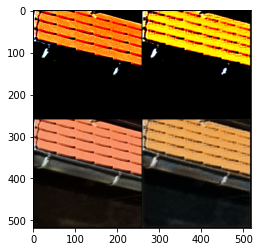

MS-SSIM loss: 0.086 | MSE: 14512.129 | perceptual loss: 1648958.250 | bpp: 0.346 |  PSNR: 24.239


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


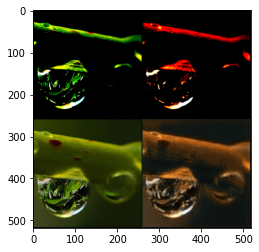

MS-SSIM loss: 0.231 | MSE: 27494.098 | perceptual loss: 1836592.625 | bpp: 0.168 |  PSNR: 21.486


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


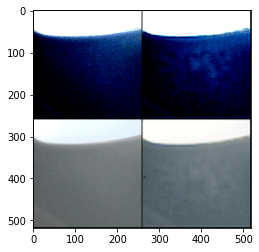

MS-SSIM loss: 0.229 | MSE: 5740.528 | perceptual loss: 945396.812 | bpp: 0.222 |  PSNR: 28.199


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


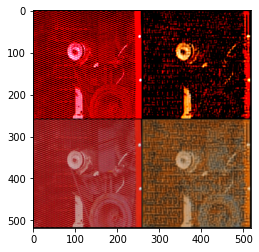

MS-SSIM loss: 0.551 | MSE: 90446.430 | perceptual loss: 3552334.250 | bpp: 0.273 |  PSNR: 16.266


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


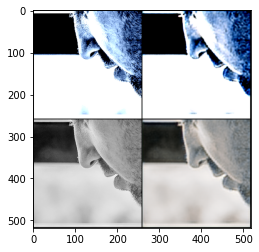

MS-SSIM loss: 0.061 | MSE: 8141.299 | perceptual loss: 1219726.500 | bpp: 0.347 |  PSNR: 26.737


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


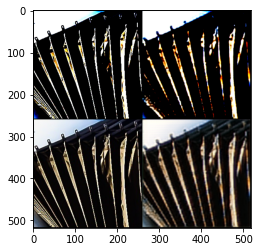

MS-SSIM loss: 0.111 | MSE: 83806.117 | perceptual loss: 3355640.250 | bpp: 0.306 |  PSNR: 16.617


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


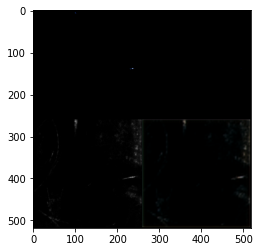

MS-SSIM loss: 0.053 | MSE: 1817.002 | perceptual loss: 907768.125 | bpp: 0.273 |  PSNR: 33.247


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


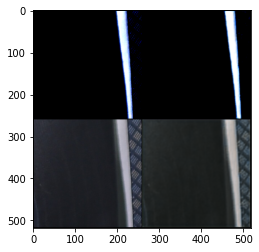

MS-SSIM loss: 0.089 | MSE: 2383.653 | perceptual loss: 748118.625 | bpp: 0.197 |  PSNR: 32.088


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


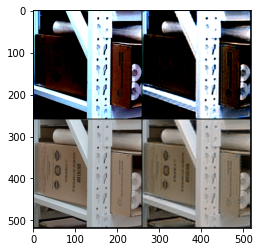

MS-SSIM loss: 0.081 | MSE: 8824.836 | perceptual loss: 1743978.625 | bpp: 0.260 |  PSNR: 26.387


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


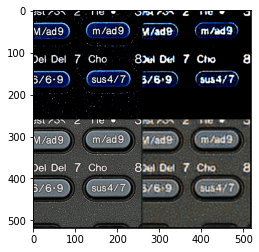

MS-SSIM loss: 0.175 | MSE: 54633.797 | perceptual loss: 2771044.500 | bpp: 0.319 |  PSNR: 18.479


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


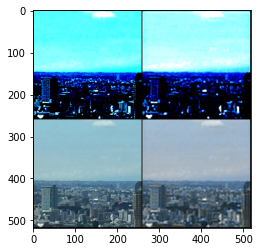

MS-SSIM loss: 0.095 | MSE: 11169.455 | perceptual loss: 1313451.750 | bpp: 0.353 |  PSNR: 25.353


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


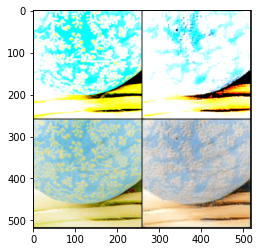

MS-SSIM loss: 0.331 | MSE: 25611.248 | perceptual loss: 2246114.500 | bpp: 0.608 |  PSNR: 21.756


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


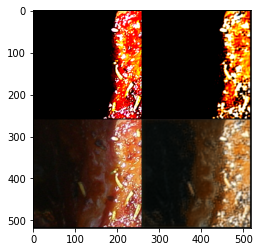

MS-SSIM loss: 0.161 | MSE: 20423.895 | perceptual loss: 2006390.750 | bpp: 0.216 |  PSNR: 22.749


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


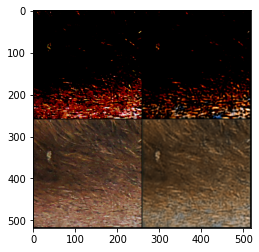

MS-SSIM loss: 0.121 | MSE: 8154.996 | perceptual loss: 1936369.375 | bpp: 0.529 |  PSNR: 26.724


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


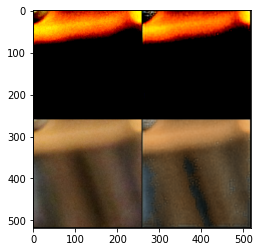

MS-SSIM loss: 0.114 | MSE: 2619.393 | perceptual loss: 1023481.562 | bpp: 1.896 |  PSNR: 31.632


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


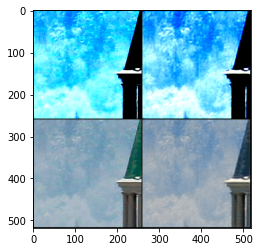

MS-SSIM loss: 0.112 | MSE: 5378.819 | perceptual loss: 1079385.500 | bpp: 0.316 |  PSNR: 28.540


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


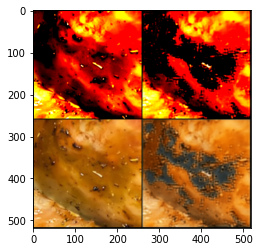

MS-SSIM loss: 0.501 | MSE: 41191.070 | perceptual loss: 2199972.250 | bpp: 1.184 |  PSNR: 19.649


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


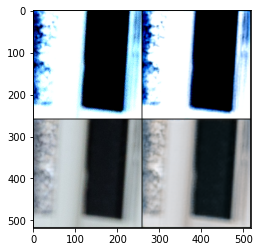

MS-SSIM loss: 0.058 | MSE: 2878.398 | perceptual loss: 1089587.625 | bpp: 0.312 |  PSNR: 31.229


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


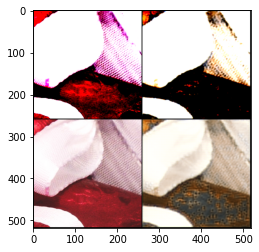

MS-SSIM loss: 0.300 | MSE: 41689.629 | perceptual loss: 2083412.250 | bpp: 0.327 |  PSNR: 19.616


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


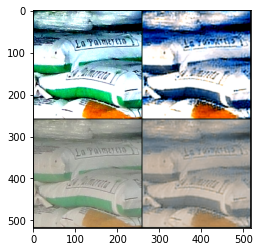

MS-SSIM loss: 0.114 | MSE: 7528.000 | perceptual loss: 1479296.625 | bpp: 0.506 |  PSNR: 27.078


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


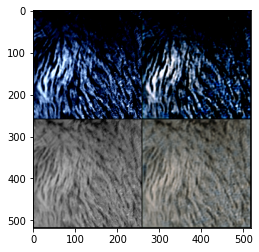

MS-SSIM loss: 0.058 | MSE: 4487.399 | perceptual loss: 1331885.375 | bpp: 0.546 |  PSNR: 29.334


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


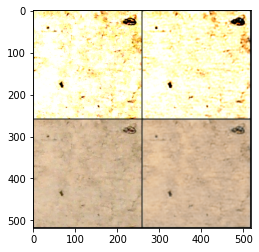

MS-SSIM loss: 0.114 | MSE: 2599.333 | perceptual loss: 1355176.625 | bpp: 0.417 |  PSNR: 31.698


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


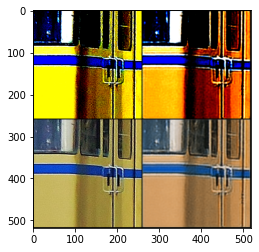

MS-SSIM loss: 0.173 | MSE: 31912.598 | perceptual loss: 2095880.625 | bpp: 0.596 |  PSNR: 20.826


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


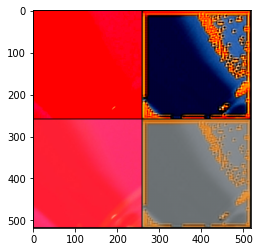

MS-SSIM loss: 1.000 | MSE: 505896.625 | perceptual loss: 1699058.500 | bpp: 1.115 |  PSNR: 8.767


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


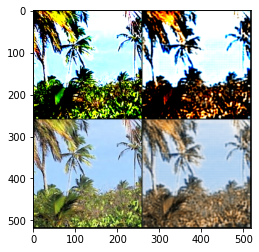

MS-SSIM loss: 0.144 | MSE: 40403.281 | perceptual loss: 2614752.500 | bpp: 0.350 |  PSNR: 19.794


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


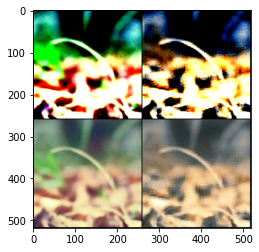

MS-SSIM loss: 0.132 | MSE: 15736.604 | perceptual loss: 1517754.375 | bpp: 0.316 |  PSNR: 23.892


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


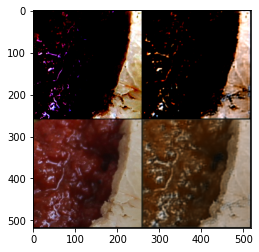

MS-SSIM loss: 0.098 | MSE: 11500.340 | perceptual loss: 1705490.125 | bpp: 0.371 |  PSNR: 25.246


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


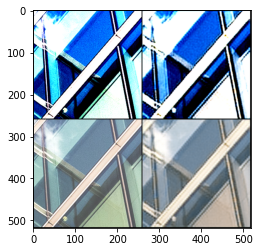

MS-SSIM loss: 0.119 | MSE: 19262.684 | perceptual loss: 1945619.625 | bpp: 0.277 |  PSNR: 23.003


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


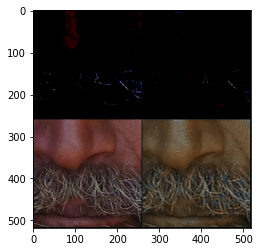

MS-SSIM loss: 0.103 | MSE: 10857.938 | perceptual loss: 1788351.250 | bpp: 2.421 |  PSNR: 25.495


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


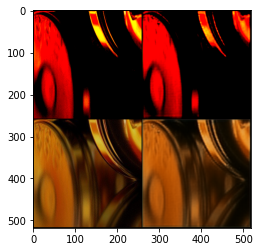

MS-SSIM loss: 0.134 | MSE: 6603.109 | perceptual loss: 1562591.875 | bpp: 1.815 |  PSNR: 27.657


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


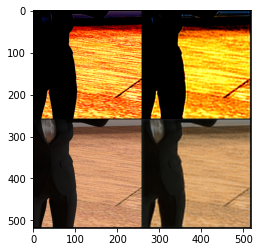

MS-SSIM loss: 0.135 | MSE: 8636.607 | perceptual loss: 1698680.000 | bpp: 4.813 |  PSNR: 26.482


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


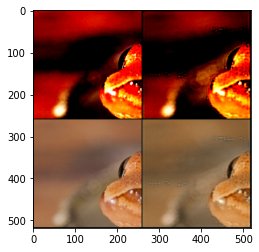

MS-SSIM loss: 0.181 | MSE: 6656.186 | perceptual loss: 909156.562 | bpp: 0.168 |  PSNR: 27.595


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


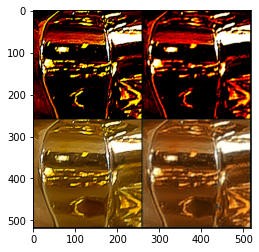

MS-SSIM loss: 0.184 | MSE: 32951.523 | perceptual loss: 2615167.000 | bpp: 0.206 |  PSNR: 20.673


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


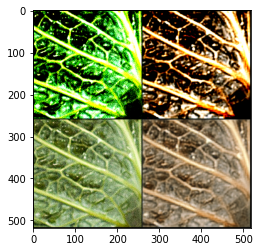

MS-SSIM loss: 0.149 | MSE: 36307.625 | perceptual loss: 2535639.250 | bpp: 0.289 |  PSNR: 20.269


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


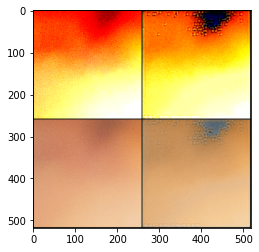

MS-SSIM loss: 0.256 | MSE: 8478.765 | perceptual loss: 1084510.250 | bpp: 0.497 |  PSNR: 26.538


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


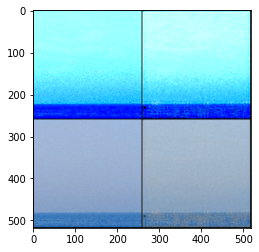

MS-SSIM loss: 0.134 | MSE: 7013.365 | perceptual loss: 796075.938 | bpp: 0.401 |  PSNR: 27.369


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


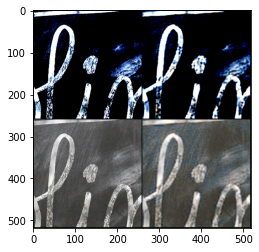

MS-SSIM loss: 0.105 | MSE: 12959.084 | perceptual loss: 1812243.750 | bpp: 0.216 |  PSNR: 24.724


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


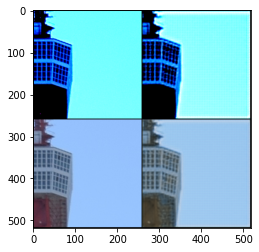

MS-SSIM loss: 0.166 | MSE: 9421.296 | perceptual loss: 1201536.875 | bpp: 0.425 |  PSNR: 26.114


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


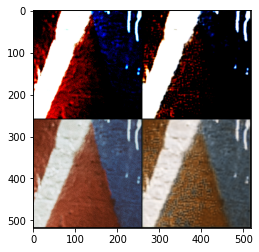

MS-SSIM loss: 0.215 | MSE: 16106.650 | perceptual loss: 1938094.250 | bpp: 0.251 |  PSNR: 23.765


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


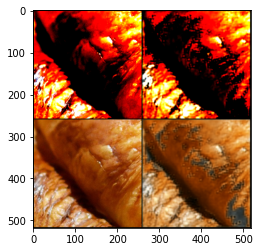

MS-SSIM loss: 0.261 | MSE: 22955.625 | perceptual loss: 2190410.750 | bpp: 0.232 |  PSNR: 22.198


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


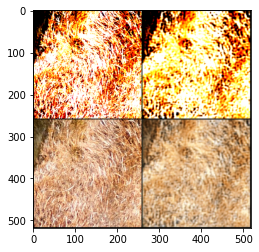

MS-SSIM loss: 0.165 | MSE: 41748.492 | perceptual loss: 3055704.500 | bpp: 0.609 |  PSNR: 19.653


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


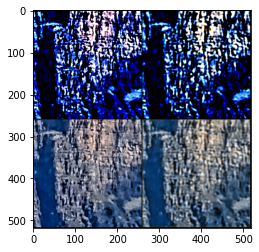

MS-SSIM loss: 0.071 | MSE: 23100.672 | perceptual loss: 2193325.000 | bpp: 0.362 |  PSNR: 22.219


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


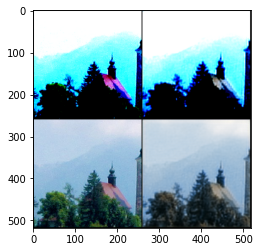

MS-SSIM loss: 0.136 | MSE: 8556.435 | perceptual loss: 1530997.000 | bpp: 0.367 |  PSNR: 26.525


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


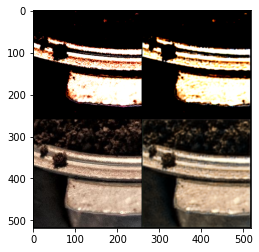

MS-SSIM loss: 0.070 | MSE: 9083.025 | perceptual loss: 1925231.625 | bpp: 0.305 |  PSNR: 26.271


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


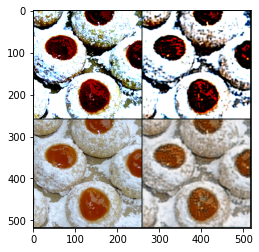

MS-SSIM loss: 0.107 | MSE: 18689.617 | perceptual loss: 2501619.000 | bpp: 0.380 |  PSNR: 23.117


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


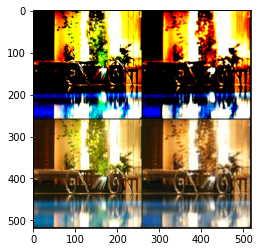

MS-SSIM loss: 0.138 | MSE: 29174.062 | perceptual loss: 2509823.750 | bpp: 0.270 |  PSNR: 21.209


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


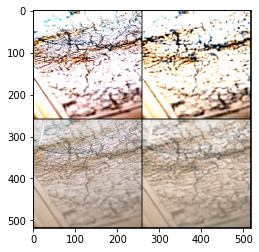

MS-SSIM loss: 0.095 | MSE: 23652.900 | perceptual loss: 2059133.000 | bpp: 0.443 |  PSNR: 22.112


In [4]:
msssim_total, mse_total, perceptual_total, bpp_total, PSNR_total = finetune(jpeg_ai, encoder, importance, decoder, probabilityModel, 
                                                           device, L1_loss, MSE_loss,
                                                           vgg16, round_straightthrough, dec_bias, d1, d2, d3)

In [5]:
print('='*80)
print('msssim: {:.3f} | mse: {:.3f} | perceptual: {:.3f} | bpp: {:.3f} | PSNR: {:.3f}'.format(
      msssim_total.tolist()/50, mse_total.tolist()/50, perceptual_total.tolist()/50, bpp_total.tolist()/50, PSNR_total/50))

msssim: 0.176 | mse: 30734.412 | perceptual: 1844773.760 | bpp: 0.560 | PSNR: 24.145
